# **Importando bibliotecas**

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import string
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from util.construction import *
from util.analysis import *
from util.graphics import *

# **Obtendo os artistas presentes no Spotify**

## **Realizando a conexão com a API do Spotify**

In [2]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='76e709d9b20c4cfd92322dae744a8a24',
                                                         client_secret='ca2ce1227ecf4500a1918025cfcdb2a4'))


# **Filtrando**

# **Criando uma rede com as informações obtidas e tratando/retirando algumas colunas**

In [2]:
df = pd.read_csv('data/spotify_artists/spotify_artists.csv')
df

,external_urls,followers,genres,id,name,popularity,uri
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH
...,...,...,...,...,...,...,...
20486,https://open.spotify.com/artist/3xx17YXYvPl9PB...,56415,"contemporary vocal jazz, ectofolk, folk, lilith",3xx17YXYvPl9PBx6Jzalk4,Shelby Lynne,48,spotify:artist:3xx17YXYvPl9PBx6Jzalk4
20487,https://open.spotify.com/artist/3jvWpZJpokYCoT...,35290,"alternative emo, emo, midwest emo",3jvWpZJpokYCoT0QV4OJg0,You Blew It!,33,spotify:artist:3jvWpZJpokYCoT0QV4OJg0
20488,https://open.spotify.com/artist/53HxKgLPRmkmUq...,72,NaN,53HxKgLPRmkmUqzOv7qVL3,Z,0,spotify:artist:53HxKgLPRmkmUqzOv7qVL3
20489,https://open.spotify.com/artist/0SYlWdOsemdRbG...,0,NaN,0SYlWdOsemdRbGNNU6FF3h,Z,0,spotify:artist:0SYlWdOsemdRbGNNU6FF3h


In [3]:
df_filtered = df[df['popularity'] >= 65]
df_filtered

,external_urls,followers,genres,id,name,popularity,uri
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH
...,...,...,...,...,...,...,...
19719,https://open.spotify.com/artist/0pVHBkObr9UNIW...,80561,NaN,0pVHBkObr9UNIWpms1e4I0,Zartmann,67,spotify:artist:0pVHBkObr9UNIWpms1e4I0
19720,https://open.spotify.com/artist/54kCbQZaZWHnww...,2213913,"french hip hop, pop urbaine, r&b francais, rap...",54kCbQZaZWHnwwj9VP2hn4,Zola,67,spotify:artist:54kCbQZaZWHnwwj9VP2hn4
19731,https://open.spotify.com/artist/3qZ2n5keOAat1S...,1799838,"mpb, pagode, partido alto, samba, samba de roda",3qZ2n5keOAat1SoF6bHwmb,Zeca Pagodinho,65,spotify:artist:3qZ2n5keOAat1SoF6bHwmb
20457,https://open.spotify.com/artist/2HIP5sNZWkrPgS...,56794,NaN,2HIP5sNZWkrPgSBWRk8XpA,SIRA,65,spotify:artist:2HIP5sNZWkrPgSBWRk8XpA


In [4]:
if not os.path.exists('data/spotify_related_artists/spotify_related_artists.csv'):

    artist_related_artists = []

    for artist_id in tqdm(df_filtered['id']):
        
        aux_list = []
        related_artists = sp.artist_related_artists(artist_id)
        
        for related_artist in related_artists['artists']:
            if related_artist['id'] in df_filtered['id'].to_numpy():
                aux_list.append(related_artist['id'])
        
        artist_related_artists.append(', '.join(aux_list))

        time.sleep(0.3) 

    df_filtered.loc[:, 'related_artists'] = artist_related_artists
    display(df_filtered)
    df_filtered.to_csv('data/spotify_related_artists/spotify_related_artists.csv', index=False)   
else:
    print('Dataframe já construído!') 


Dataframe já construído!


# **Analisando os dados obtidos**:

In [5]:
df =  pd.read_csv('data/spotify_related_artists/spotify_related_artists.csv')
df

,external_urls,followers,genres,id,name,popularity,uri,related_artists
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY,"5WUlDfRSoLAfcVSX1WnrxN, 2wY79sveU1sp5g7SokKOiI..."
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,"4nDoRrQiYLoBzwC5BhVJzF, 0C8ZW7ezQVs4URX5aX7Kqx..."
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca,"5dHt1vcEm9qb8fCyLcB3HL, 2P5sC9cVZDToPxyomzF1UH..."
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,"0C8ZW7ezQVs4URX5aX7Kqx, 1McMsnEElThX1knmY4oliG..."
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH,"77SW9BnxLY8rJ0RciFqkHh, 0epOFNiUfyON9EYx7Tpr6V..."
...,...,...,...,...,...,...,...,...
3018,https://open.spotify.com/artist/0pVHBkObr9UNIW...,80561,NaN,0pVHBkObr9UNIWpms1e4I0,Zartmann,67,spotify:artist:0pVHBkObr9UNIWpms1e4I0,"2E5bmPbkiGhZ3ZK798zFIb, 5RgzUZORebl59TcvCRZsD2..."
3019,https://open.spotify.com/artist/54kCbQZaZWHnww...,2213913,"french hip hop, pop urbaine, r&b francais, rap...",54kCbQZaZWHnwwj9VP2hn4,Zola,67,spotify:artist:54kCbQZaZWHnwwj9VP2hn4,"1q7T9rFQ2a2ukA1PU51fo3, 6HCBnyTBSLdb3TFn2ayulY..."
3020,https://open.spotify.com/artist/3qZ2n5keOAat1S...,1799838,"mpb, pagode, partido alto, samba, samba de roda",3qZ2n5keOAat1SoF6bHwmb,Zeca Pagodinho,65,spotify:artist:3qZ2n5keOAat1SoF6bHwmb,NaN
3021,https://open.spotify.com/artist/2HIP5sNZWkrPgS...,56794,NaN,2HIP5sNZWkrPgSBWRk8XpA,SIRA,65,spotify:artist:2HIP5sNZWkrPgSBWRk8XpA,"2SRd7Kx7xWkZjoaFKgEreg, 5RgzUZORebl59TcvCRZsD2..."


In [6]:
network = createNetowrk(df, 'related_artists')
toEdgesList(network, 'spotify_related_artists')

0it [00:00, ?it/s]

3023it [00:00, 58081.84it/s]


In [41]:
nx.community.partition_quality(network, louvain_communities)

(0.9238391845979615, 0.9617599725729478)

In [39]:
louvain_communities = nx.community.louvain_communities(network, weight=None, seed=42)

for index, community in enumerate(louvain_communities):
    print(f'Comunidade {index+1:2}:', end=' ')
    community_list = []
    for artists_id in community:
        community_list.append((df[df['id']==artists_id]['name']).iloc[0])
    print(community_list)

Comunidade  1: ['KXLLSWXTCH', 'Black Gryph0n', 'Oliver Tree', 'Insane Clown Posse', '1nonly', 'Joey Valence & Brae', 'Stellar', 'HAARPER', 'Yung Gravy', 'Lil Tracy', 'VOILÀ', 'BONES', 'Sam Haft', 'Livingston', 'Freddie Dredd', '$uicideboy$', 'Lil Darkie', 'Cast of EPIC: The Musical', 'Lil Peep', "Poor Man's Poison", 'Ryan Mack', 'GRAHAM', 'Ghostemane', 'Erika Henningsen', 'ZillaKami', 'Pouya', 'Nic D', 'Ramirez', 'Xavier Wulf', '$NOT', 'Andrew Underberg', 'Steven Rodriguez', 'bbno$', 'Powfu', 'Chri$tian Gate$', 'Connor Price', 'Night Lovell', 'Jorge Rivera-Herrans', 'Nathan Evans', 'Blake Roman', 'BoyWithUke', 'Stephanie Beatriz']
Comunidade  2: ['Rajat Nagpal', 'Mohammed Rafi', 'Talha Anjum', 'Raghav Chaitanya', 'Arijit Singh', 'Alka Yagnik', 'Jubin Nautiyal', 'MixSingh', 'Raj Shekhar', 'Navaan Sandhu', 'Antara Mitra', 'Atif Aslam', 'Neha Kakkar', 'Amitabh Bhattacharya', 'Arjan Dhillon', 'Guru Randhawa', 'Jasmine Sandlas', 'Armaan Malik', 'Tulsi Kumar', 'Vishal Mishra', 'Rochak Kohli'

In [42]:
nx.community.modularity(network, louvain_communities)

0.8663026091172255

In [8]:
printInformations(network)

Quantidade de vértices: 3023
Quantidade de arestas: 17660
Quantidade de componentes: 124
Menor grau da rede: 0
Maior grau da rede: 46
Grau médio da rede: 11.683757856434006
Densidade da rede: 0.003866233572612179
Distância média: 7.614761115171579
Coeficiente de clustering médio: 0.5135705768991174 (apenas 94.21% da rede foi considerada no cálculo, que que possuem grau maior do que um)


In [9]:
frequencies_of_degrees, probability_of_degrees, accumulated_probability_of_degress = degreeDistribution(network)

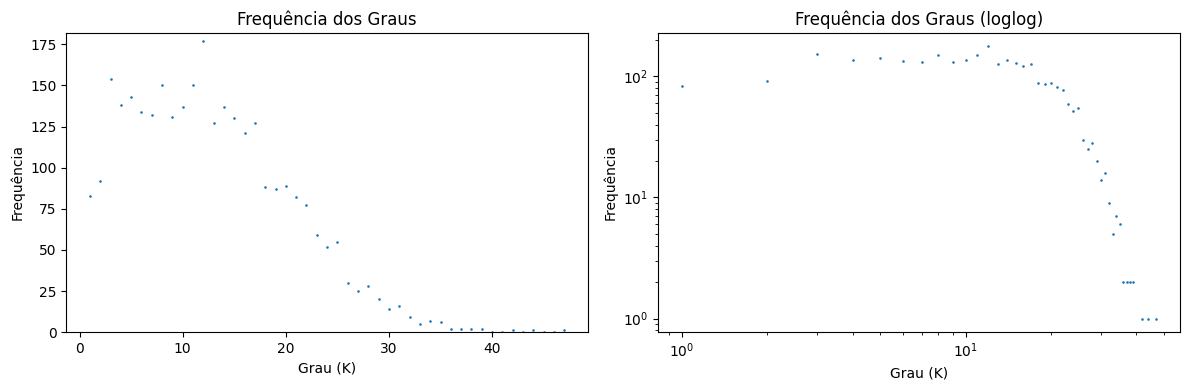

In [10]:
createGraphic(data = frequencies_of_degrees, xLabel = 'Grau (K)', yLabel = 'Frequência', title = 'Frequência dos Graus', limit = 5, lines = False, name_network = 'spotify_related_artists')

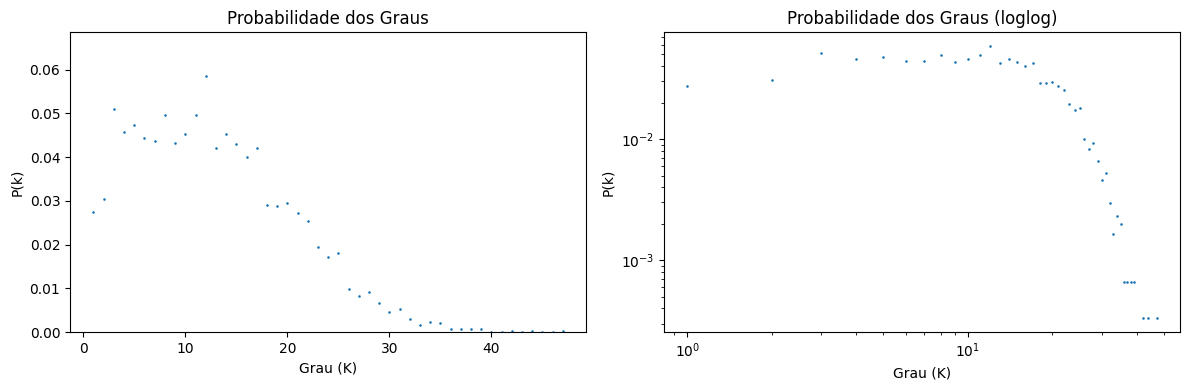

In [11]:
createGraphic(data = probability_of_degrees, xLabel = 'Grau (K)', yLabel = 'P(k)', title = 'Probabilidade dos Graus', limit = 0.01, lines = False,  name_network = 'spotify_related_artists')

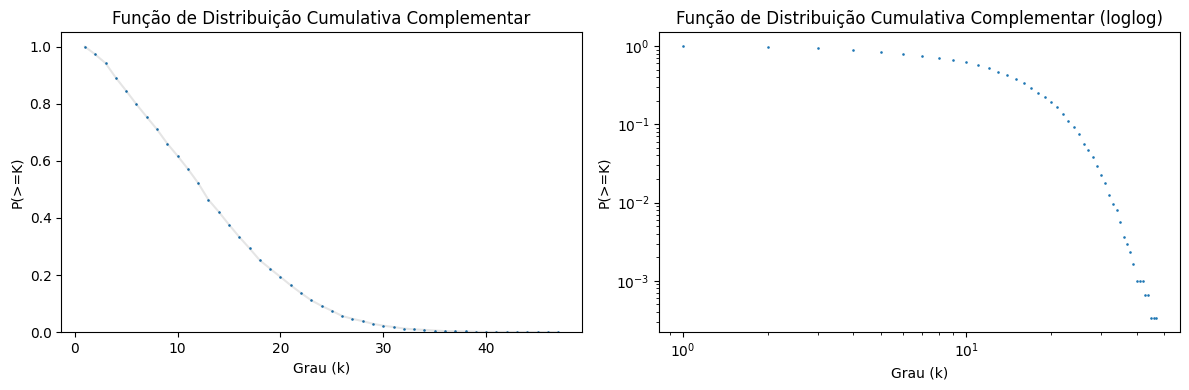

In [12]:
createGraphic(data = accumulated_probability_of_degress, xLabel = 'Grau (k)', yLabel = 'P(>=K)', title = 'Função de Distribuição Cumulativa Complementar', limit = 0.05, lines = True,  name_network = 'spotify_related_artists')

In [13]:
degree_centrality, eigenvector_centrality, closeness_centrality, betweenness_centrality = calculateCentralities(network)

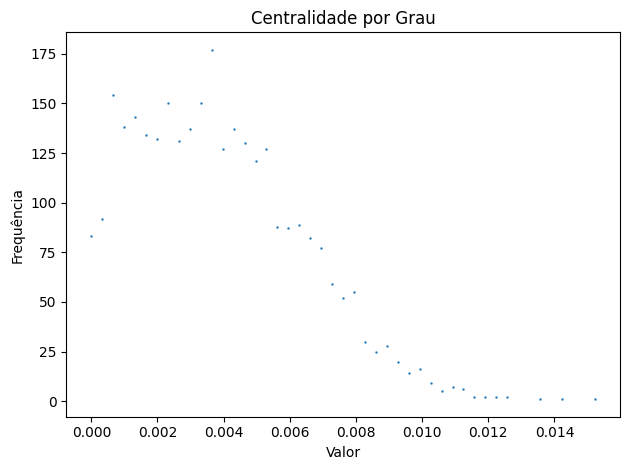

Informações gerais sobre os resultados encontrados:
	Quantidade de valores diferentes para a centralidade em estudo: 42.
	O menor valor é 0.0 e sua frequência é 83.
	O maior valor é 0.015221707478491065 e sua frequência é 1.


In [14]:
analysis_centrality = createGraphicCentrality(data = degree_centrality, title = 'Centralidade por Grau', name_network = 'spotify_related_artists')
printInformationAnalysisCentrality(analysis_centrality)

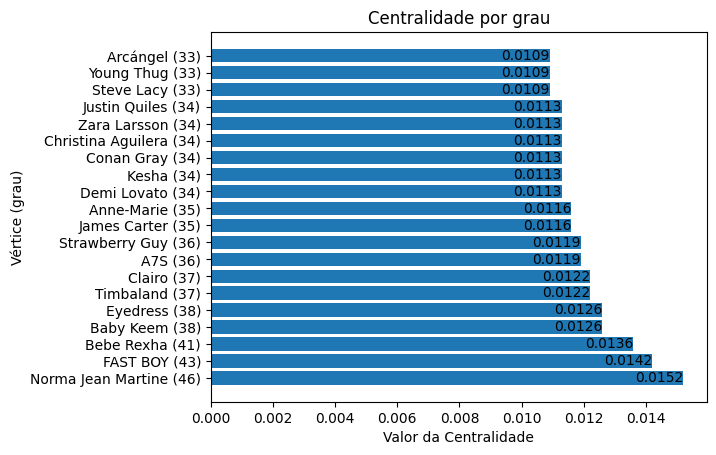

In [15]:
createRankingCentrality(df=df, centrality = degree_centrality, network = network, title = 'Centralidade por grau', name_network = 'spotify_related_artists')

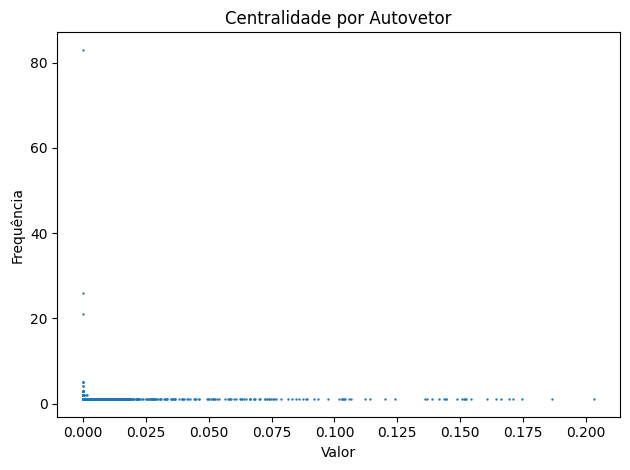

Informações gerais sobre os resultados encontrados:
	Quantidade de valores diferentes para a centralidade em estudo: 2808.
	O menor valor é 5.395789171754301e-160 e sua frequência é 83.
	O maior valor é 0.2034206732690556 e sua frequência é 1.


In [16]:
analysis_centrality = createGraphicCentrality(data = eigenvector_centrality, title = 'Centralidade por Autovetor', name_network = 'spotify_related_artists')
printInformationAnalysisCentrality(analysis_centrality)

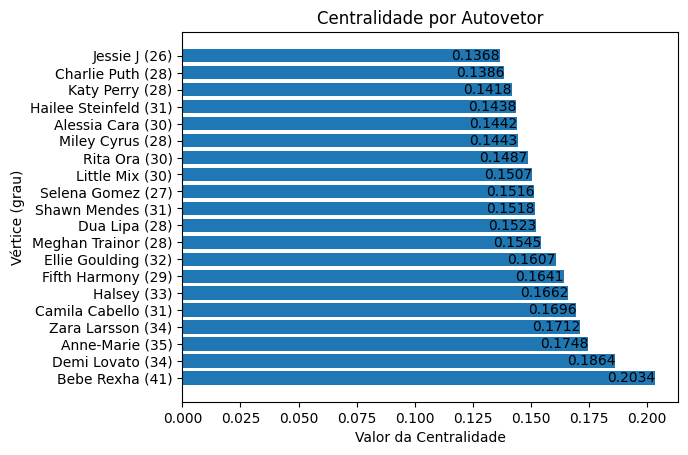

In [17]:
centrality_ranking = sorted(eigenvector_centrality, reverse = True)
createRankingCentrality(df=df, centrality = eigenvector_centrality, network = network, title = 'Centralidade por Autovetor', name_network = 'spotify_related_artists')

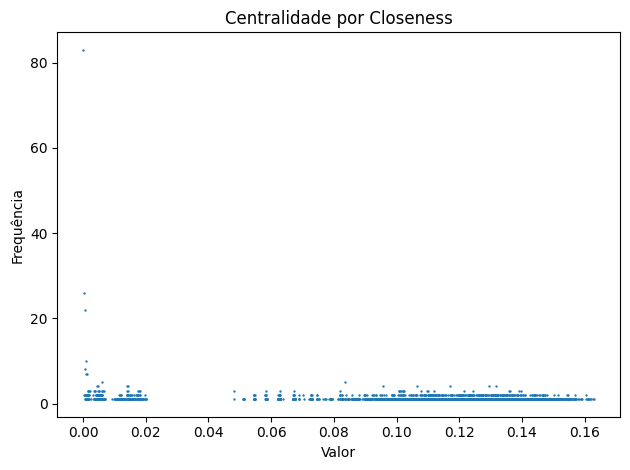

Informações gerais sobre os resultados encontrados:
	Quantidade de valores diferentes para a centralidade em estudo: 2408.
	O menor valor é 0.0 e sua frequência é 83.
	O maior valor é 0.16311052597432893 e sua frequência é 1.


In [18]:
analysis_centrality = createGraphicCentrality(data = closeness_centrality, title = 'Centralidade por Closeness', name_network = 'spotify_related_artists')
printInformationAnalysisCentrality(analysis_centrality)

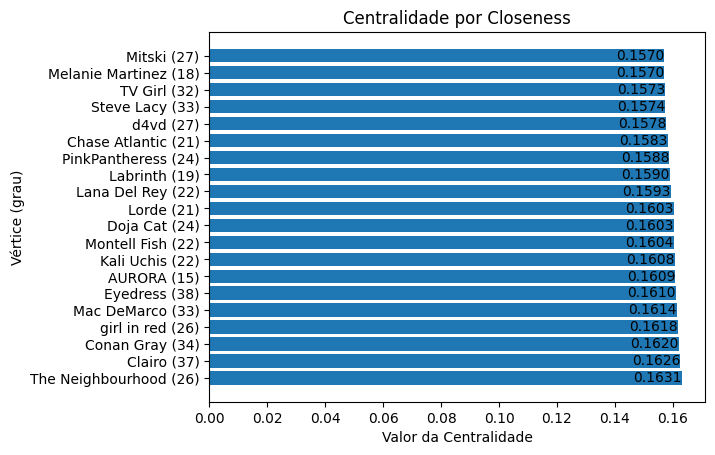

In [19]:
centrality_ranking = sorted(closeness_centrality, reverse = True)
createRankingCentrality(df=df, centrality = closeness_centrality, network = network, title = 'Centralidade por Closeness', name_network = 'spotify_related_artists')

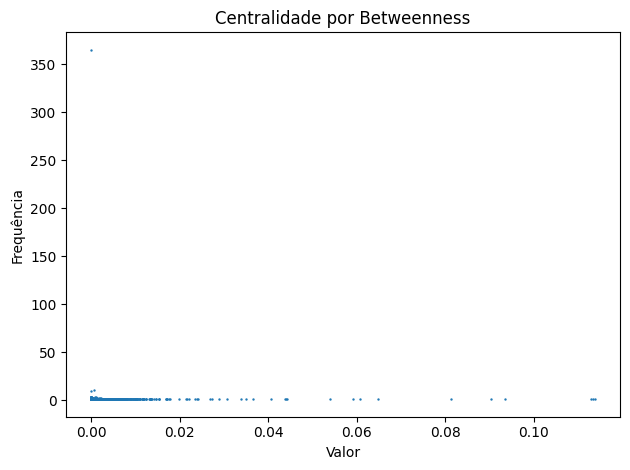

Informações gerais sobre os resultados encontrados:
	Quantidade de valores diferentes para a centralidade em estudo: 2586.
	O menor valor é 0.0 e sua frequência é 365.
	O maior valor é 0.1137428420740468 e sua frequência é 1.


In [20]:
analysis_centrality = createGraphicCentrality(data = betweenness_centrality, title = 'Centralidade por Betweenness', name_network = 'spotify_related_artists')
printInformationAnalysisCentrality(analysis_centrality)

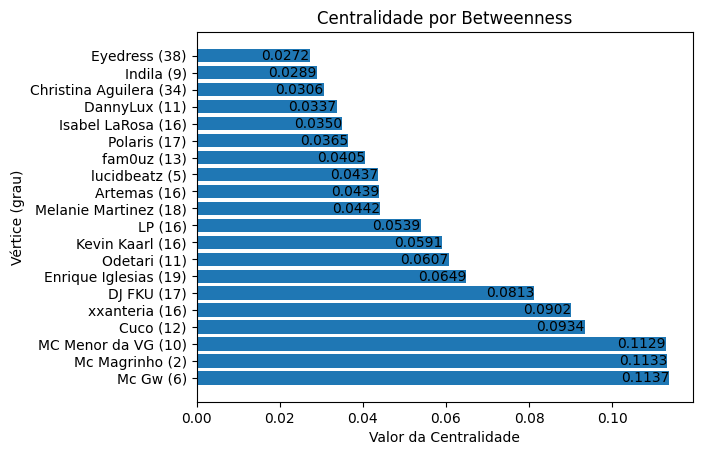

In [21]:
centrality_ranking = sorted(betweenness_centrality, reverse = True)
createRankingCentrality(df=df, centrality = betweenness_centrality, network = network, title = 'Centralidade por Betweenness', name_network = 'spotify_related_artists')